In [ ]:
!pip install scikit-learn yellowbrick matplotlib seaborn pandas numpy

In [300]:
import pandas as pd

In [301]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")
print("Number of data", len(data))
data.head()

Number of data 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [302]:
## Check the data and find missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [303]:
## Because only income has missing values and it is not alot, we will drop the rows with missing values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [304]:
data['Marital_Status'].astype(str).unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [305]:
# Drop columns with martial status which are yoo and absurd

data = data[data['Marital_Status'] != 'Absurd']
data = data[data['Marital_Status'] != 'YOLO']

data['Marital_Status'].astype(str).unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone'],
      dtype=object)

In [306]:
# Create new features to help with the anaylsis
import numpy as np

data['TotalSpending'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

data['Age'] = 2024 - data['Year_Birth']

data['Education'] = data['Education'].map({'Graduation': 'Graduate', 'PhD': 'PostGraduate', 'Master': 'PostGraduate', '2n Cycle': 'UnderGraduate', 'Basic': 'UnderGraduate'})

data['isParent'] = np.where(data['Kidhome'] + data['Teenhome'] > 0, 1, 0)

data["Marital_Status"] = data["Marital_Status"].map({'Single': 'Alone', 'Together': 'NotAlone', 'Married': 'NotAlone', 'Divorced': 'Alone', 'Widow': 'Alone', 'Alone': 'Alone'})

data['FamilySize'] = data["Marital_Status"].map({'Alone': 1, 'NotAlone': 2}) + data["Kidhome"] + data["Teenhome"]

data['Children'] = data["Kidhome"] + data["Teenhome"]

data['CustomerTimeInDays'] = (pd.to_datetime("2024-11-13") - pd.to_datetime(data['Dt_Customer'], dayfirst=True, format='%d-%m-%Y')).dt.days

data['TotalPurchases'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

data = data.drop(columns=['Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
                          'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'])

data.head()

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,TotalSpending,Age,isParent,FamilySize,Children,CustomerTimeInDays,TotalPurchases,TotalAcceptedCmp
0,5524,Graduate,Alone,58138.0,58,7,0,3,11,1617,67,0,1,0,4453,25,1
1,2174,Graduate,Alone,46344.0,38,5,0,3,11,27,70,1,3,2,3903,6,0
2,4141,Graduate,NotAlone,71613.0,26,4,0,3,11,776,59,0,2,0,4102,21,0
3,6182,Graduate,NotAlone,26646.0,26,6,0,3,11,53,40,1,3,1,3929,8,0
4,5324,PostGraduate,NotAlone,58293.0,94,5,0,3,11,422,43,1,3,1,3951,19,0


In [307]:
## Check for columns whch are not unique and drop them
df = data.copy()
df.nunique()

ID                    2212
Education                3
Marital_Status           2
Income                1973
Recency                100
NumWebVisitsMonth       16
Complain                 2
Z_CostContact            1
Z_Revenue                1
TotalSpending         1046
Age                     59
isParent                 2
FamilySize               5
Children                 4
CustomerTimeInDays     662
TotalPurchases          39
TotalAcceptedCmp         6
dtype: int64

In [308]:
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])
df.head()

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,TotalSpending,Age,isParent,FamilySize,Children,CustomerTimeInDays,TotalPurchases,TotalAcceptedCmp
0,5524,Graduate,Alone,58138.0,58,7,0,1617,67,0,1,0,4453,25,1
1,2174,Graduate,Alone,46344.0,38,5,0,27,70,1,3,2,3903,6,0
2,4141,Graduate,NotAlone,71613.0,26,4,0,776,59,0,2,0,4102,21,0
3,6182,Graduate,NotAlone,26646.0,26,6,0,53,40,1,3,1,3929,8,0
4,5324,PostGraduate,NotAlone,58293.0,94,5,0,422,43,1,3,1,3951,19,0


In [309]:
print(df.isnull().sum())

ID                    0
Education             0
Marital_Status        0
Income                0
Recency               0
NumWebVisitsMonth     0
Complain              0
TotalSpending         0
Age                   0
isParent              0
FamilySize            0
Children              0
CustomerTimeInDays    0
TotalPurchases        0
TotalAcceptedCmp      0
dtype: int64


In [310]:
## Turn all the data into numerical

from sklearn.calibration import LabelEncoder

types = (df.dtypes == "object")
columns = list(types[types].index)
encoder = LabelEncoder()
for column in columns:
    df[column] = df[[column]].apply(encoder.fit_transform)

df.head()

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,TotalSpending,Age,isParent,FamilySize,Children,CustomerTimeInDays,TotalPurchases,TotalAcceptedCmp
0,5524,0,0,58138.0,58,7,0,1617,67,0,1,0,4453,25,1
1,2174,0,0,46344.0,38,5,0,27,70,1,3,2,3903,6,0
2,4141,0,1,71613.0,26,4,0,776,59,0,2,0,4102,21,0
3,6182,0,1,26646.0,26,6,0,53,40,1,3,1,3929,8,0
4,5324,1,1,58293.0,94,5,0,422,43,1,3,1,3951,19,0


<Axes: >

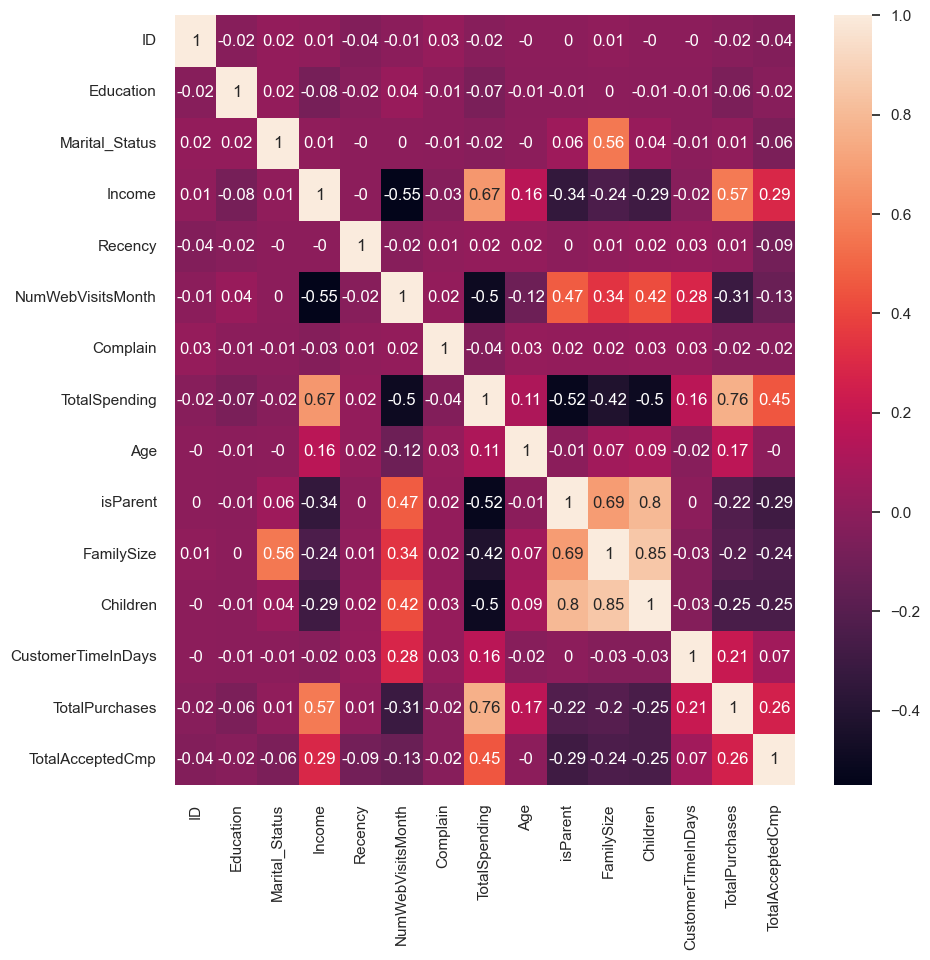

In [311]:
import seaborn as sns

sns.heatmap(df.corr().round(2), annot=True)

In [312]:
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
scaled_data = pd.DataFrame(scaler.transform(df), columns = df.columns)
scaled_data.head()

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,TotalSpending,Age,isParent,FamilySize,Children,CustomerTimeInDays,TotalPurchases,TotalAcceptedCmp
0,-0.019627,-0.893369,-1.352274,0.234515,0.309300,0.693355,-0.097901,1.675363,0.985949,-1.582892,-1.762071,-1.265658,1.530801,1.319736,0.619873
1,-1.051282,-0.893369,-1.352274,-0.233840,-0.381922,-0.132103,-0.097901,-0.961337,1.236380,0.631755,0.448137,1.404476,-1.187523,-1.156308,-0.502189
2,-0.445531,-0.893369,0.739495,0.769624,-0.796656,-0.544832,-0.097901,0.280731,0.318133,-1.582892,-0.656967,-1.265658,-0.203984,0.798464,-0.502189
3,0.183009,-0.893369,0.739495,-1.016073,-0.796656,0.280626,-0.097901,-0.918221,-1.267929,0.631755,0.448137,0.069409,-1.059020,-0.895672,-0.502189
4,-0.081218,0.569349,0.739495,0.240670,1.553500,-0.132103,-0.097901,-0.306307,-1.017498,0.631755,0.448137,0.069409,-0.950287,0.537827,-0.502189


In [313]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(scaled_data)
pca_df = pd.DataFrame(pca.transform(scaled_data), columns=['PC1', 'PC2', 'PC3'])
pca_df.describe()

,PC1,PC2,PC3
count,2.212000e+03,2.212000e+03,2.212000e+03
mean,-6.424437e-17,-4.175884e-17,-6.424437e-18
std,2.020323e+00,1.317809e+00,1.143437e+00
min,-4.764314e+00,-4.545048e+00,-3.080109e+00
25%,-1.640735e+00,-8.235558e-01,-8.530456e-01
50%,-3.959166e-01,4.890613e-02,-2.546406e-02
75%,1.204347e+00,9.152209e-01,8.639810e-01
max,7.037854e+00,8.488271e+00,4.165639e+00


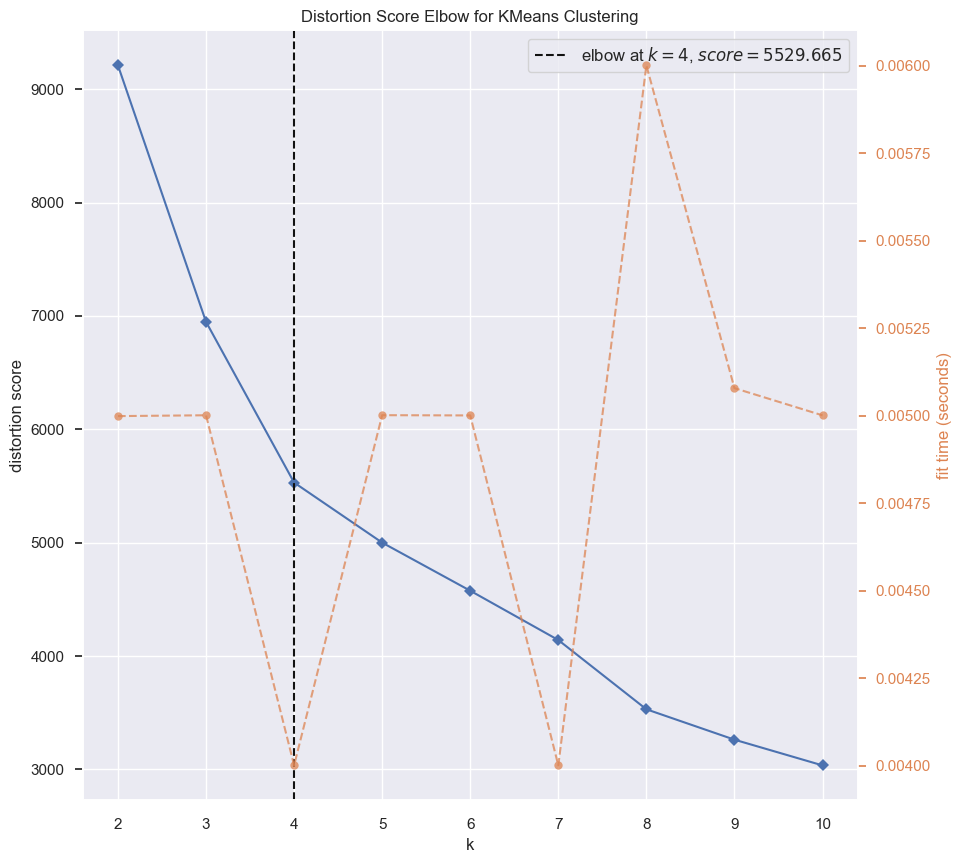

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [314]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(pca_df)
elbow.show()


In [315]:
kmeans = KMeans(n_clusters=4).fit(scaled_data)
df['Cluster'] = kmeans.fit_predict(scaled_data)
df.head()

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,TotalSpending,Age,isParent,FamilySize,Children,CustomerTimeInDays,TotalPurchases,TotalAcceptedCmp,Cluster
0,5524,0,0,58138.0,58,7,0,1617,67,0,1,0,4453,25,1,2
1,2174,0,0,46344.0,38,5,0,27,70,1,3,2,3903,6,0,0
2,4141,0,1,71613.0,26,4,0,776,59,0,2,0,4102,21,0,2
3,6182,0,1,26646.0,26,6,0,53,40,1,3,1,3929,8,0,1
4,5324,1,1,58293.0,94,5,0,422,43,1,3,1,3951,19,0,1


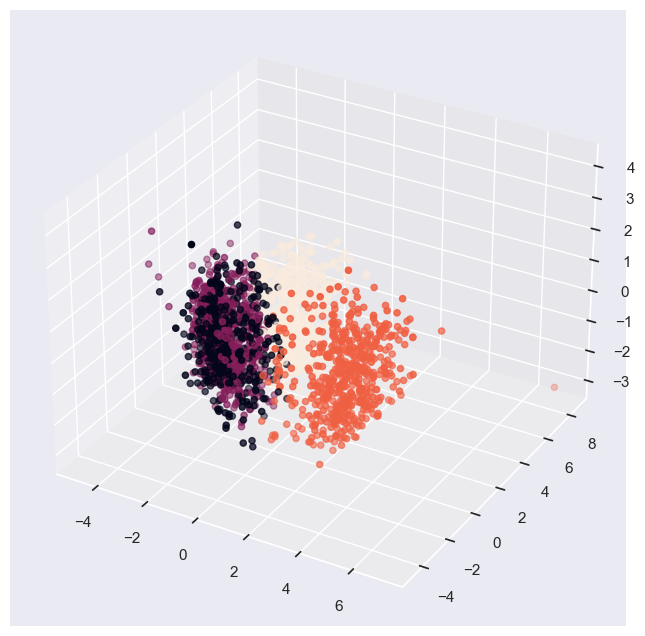

In [316]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=df['Cluster'])
plt.show()

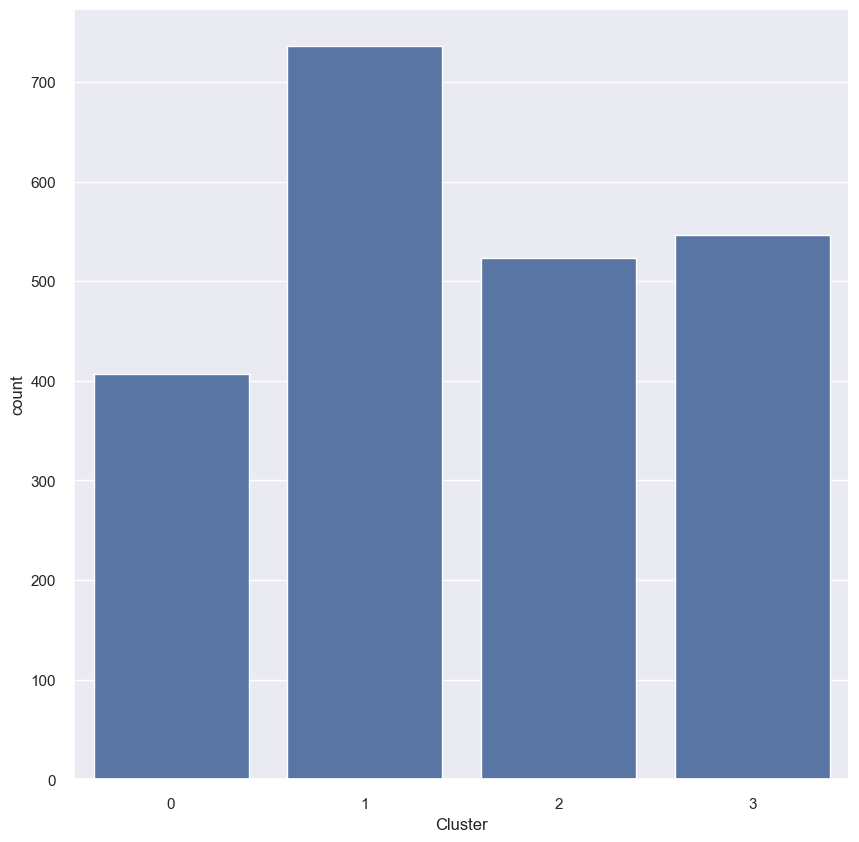

In [317]:
sns.countplot(x=df["Cluster"])
plt.show()

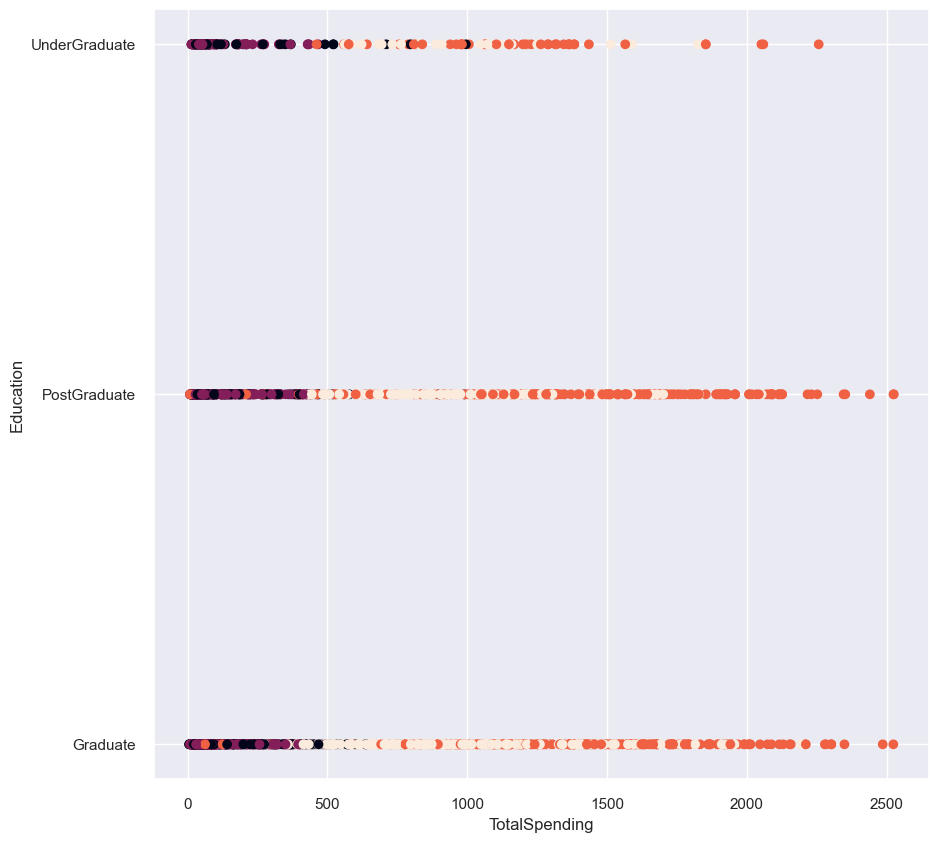

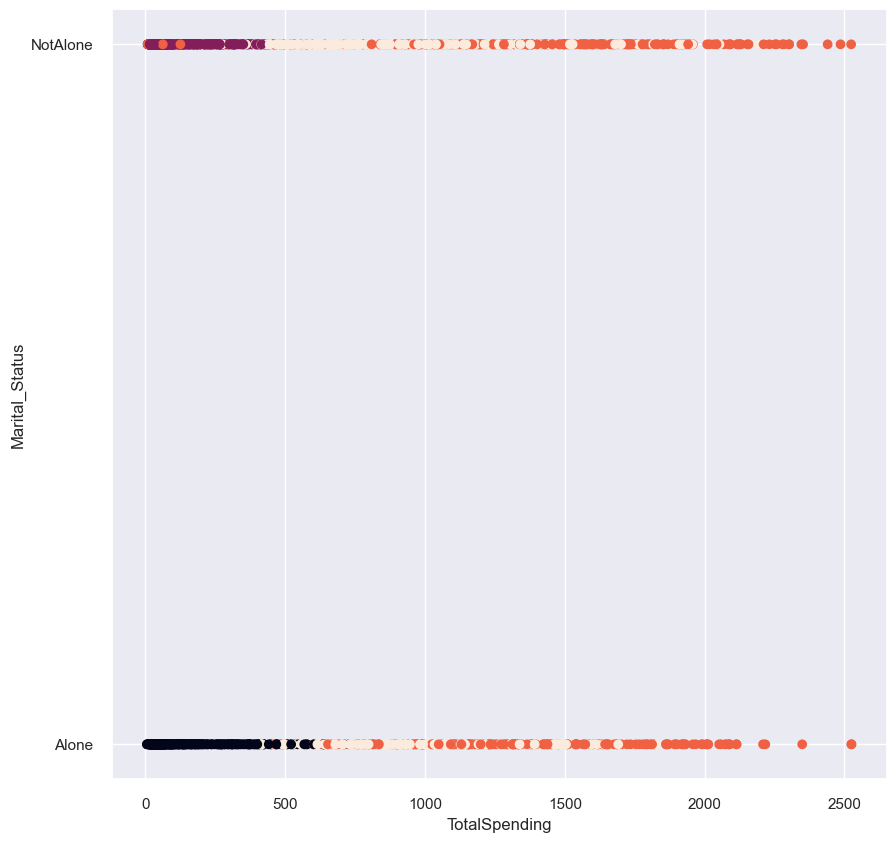

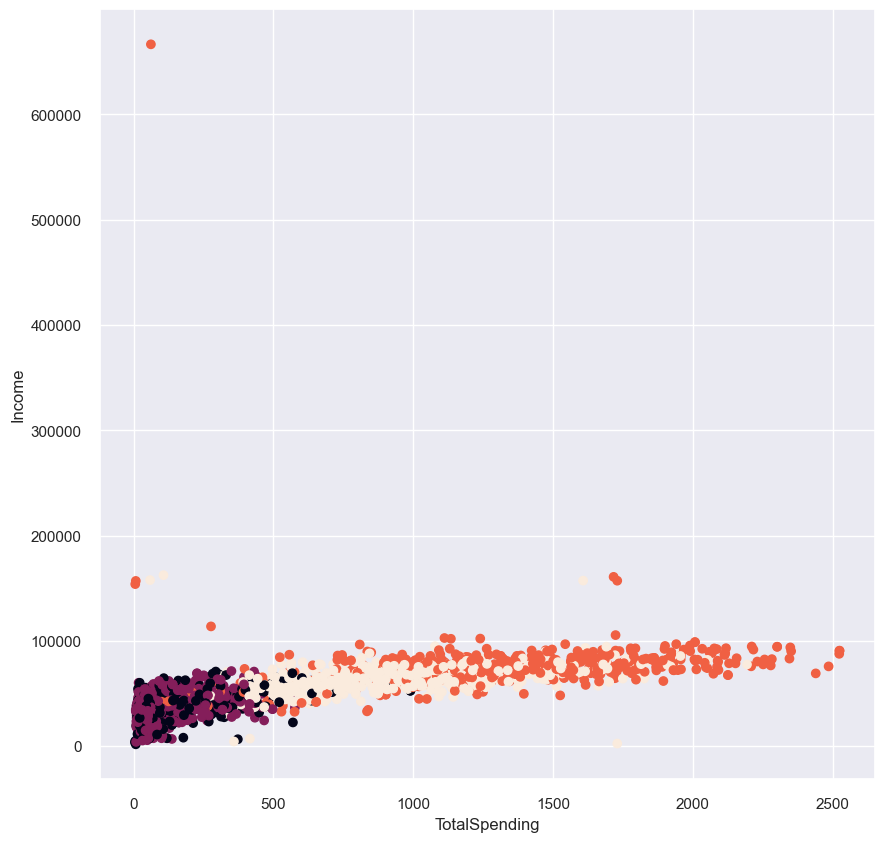

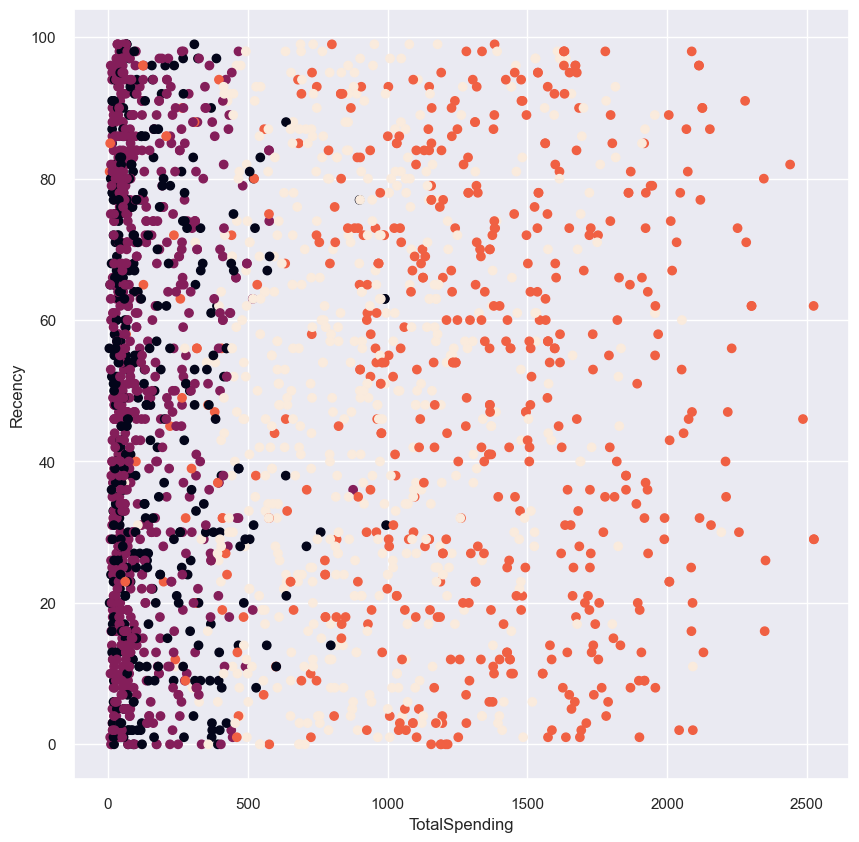

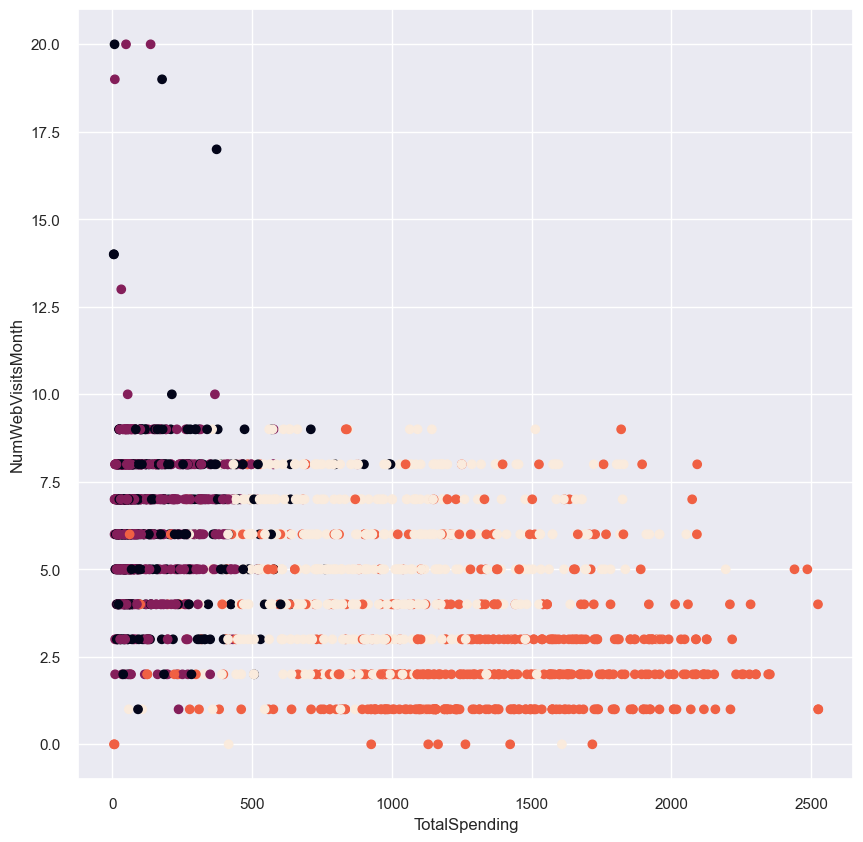

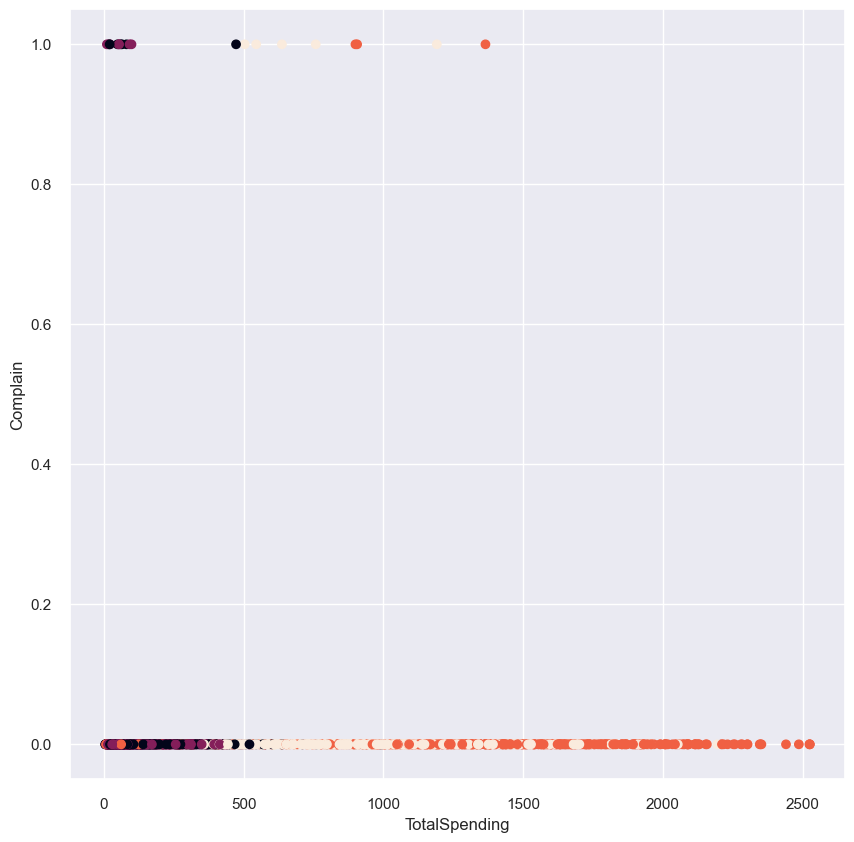

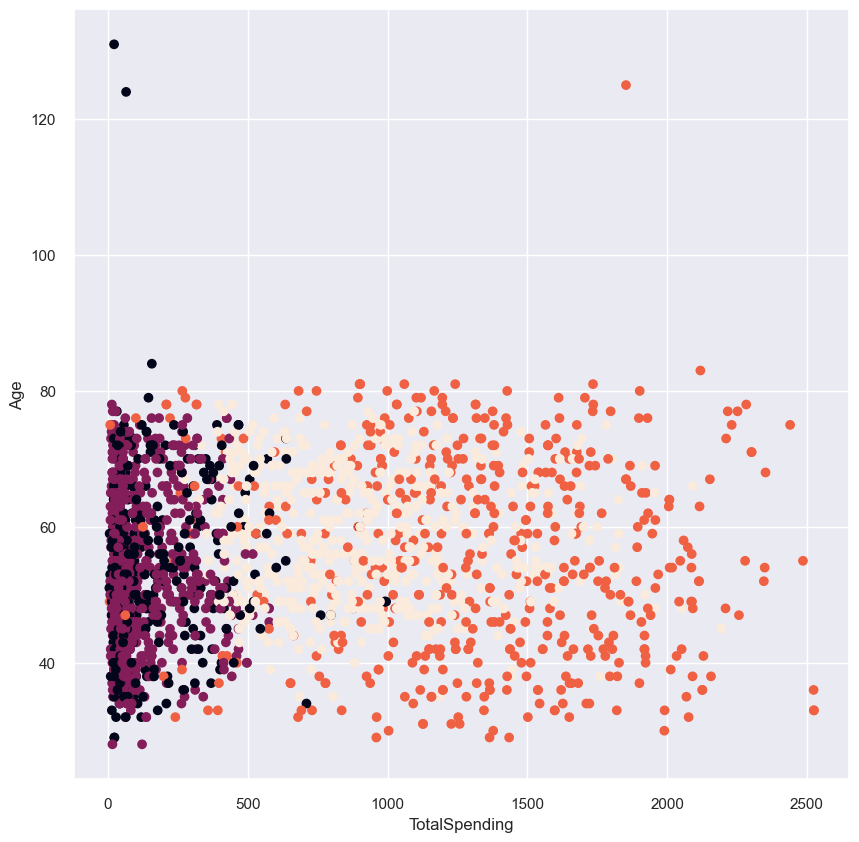

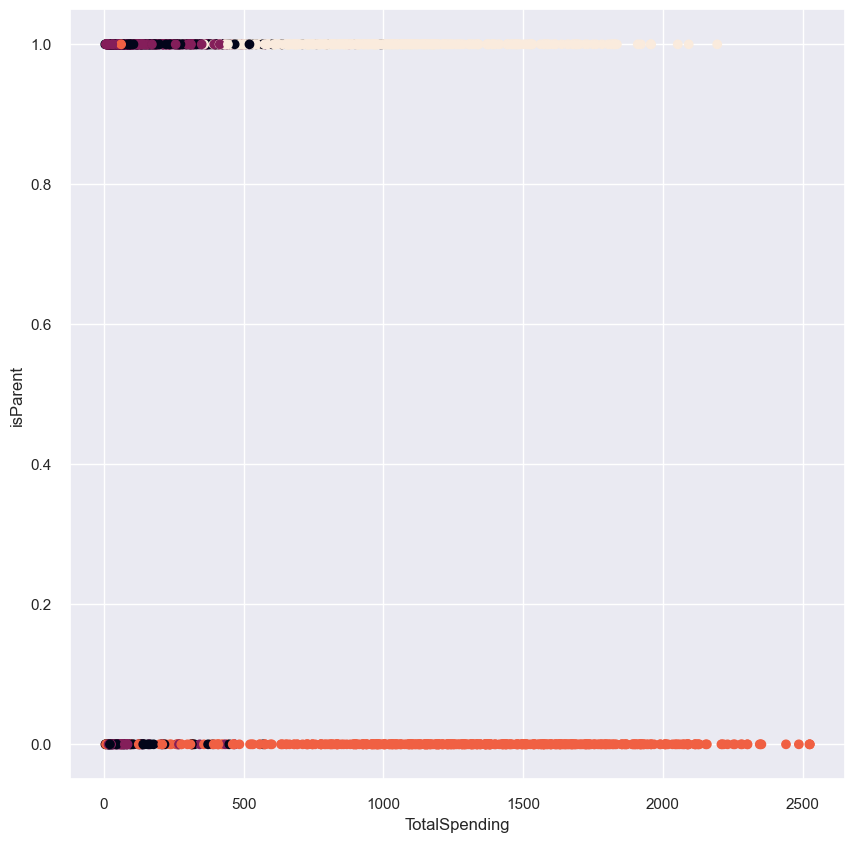

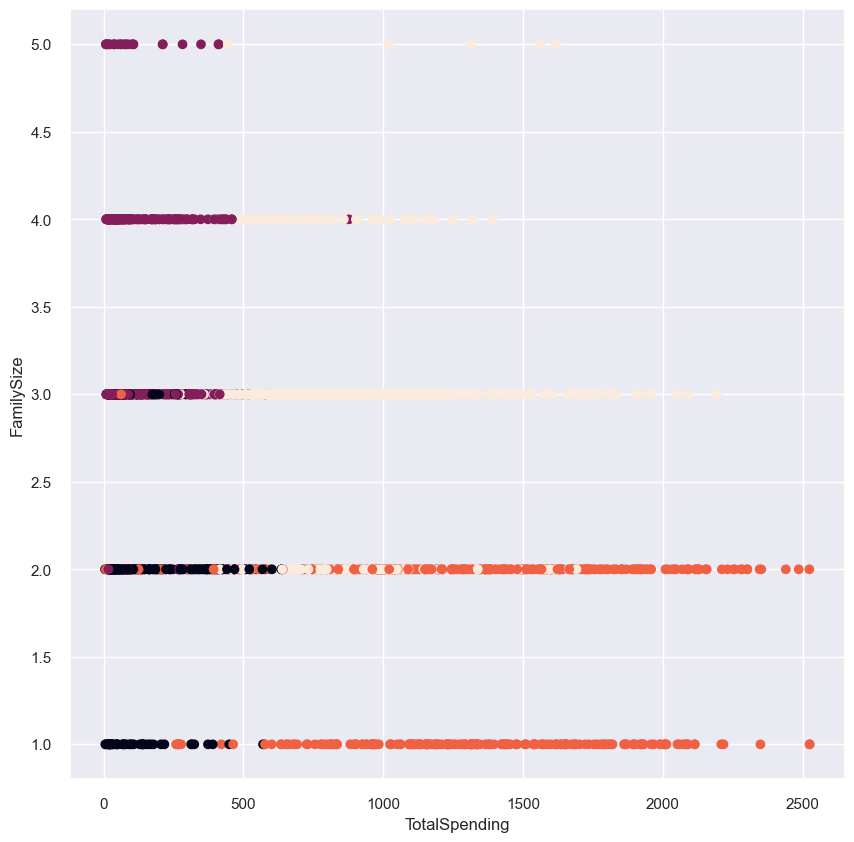

In [318]:
columns = [ "Education", "Marital_Status", "Income", "Recency", "NumWebVisitsMonth", "Complain", "Age", "isParent", "FamilySize"]

for column in columns:
    plt.scatter(data["TotalSpending"], data[column], c=df["Cluster"])
    plt.ylabel(column)
    plt.xlabel("TotalSpending")
    plt.show()